# Time Series for Sales Analysis

## Importing basic libraries for data loading and manipulations

In [1]:
import numpy as np
import pandas as pd
import os

# I need to specify where the path to file where the data is stored
path = "./Sales_Data"

# Since there are several files with monthly data, I am going to list the names of each
# file to later import them iteratively  
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

# To gather all the information contained within the files, I created an empty dataframe
# to concatenate each file into a single dataframe
dataframe = pd.DataFrame()

# Here I do a for loop thoughout the list of files names and I import each .csv file as a single dataframe
# and later concatenate them to a single one
for file in files:
    current_data = pd.read_csv(path+"/"+file)
    dataframe = pd.concat([dataframe, current_data])

# Then I show the firsts and the lasts five row of the complete dataframe    
dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"
...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016"
15222,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016"
15223,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001"
15224,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016"


I see that there are 186850 rows and 6 columns within this dataframe. In what follows, I will carry out an exploratory analysis for data preprocessing before doing the analysis.

## Quick statistical report

I will perform a quick statistical report using the library Pandas-Profiling

In [2]:
import pandas_profiling as pdp

pdp.ProfileReport(dataframe)

1. I see in the Warning tab that the features "Order ID", "Order Date" and "Purchase Address" are uniformly distributed, which means that this database is simulated, since in real life one doesn't find perfectly uniform distributions. 
2. I can see as well the presence of missing values within some of the features, like "Order ID", "Product", "Quantity Ordered", "Price Each", "Order Date" and "Purchase Address".
3. There are as well two correlated features: "Product" and "Price Each".
4. I see that in that all the features contain a data formatting error since there appear the names of the columns as values. Since I don't have any extra information about these singular values, I will simply substitute them by a NaNs.
5. The features 'Order ID', 'Quantity Ordered' and 'Price Each' are supposed to be numerical, however, their datatypes are categorical. I will turn them to numerical.
6. I see as well in the 'Order Date' feature, the datatype is string and the month and the days are interchanged from positions. I will change the data type to datetime and write the date in the format YY/mm/DD HH:MM.

In [3]:
dataframe['Order ID'] = dataframe['Order ID'].replace('Order ID',np.NaN)
dataframe['Order Date'] = dataframe['Order Date'].replace('Order Date',np.NaN)
dataframe['Purchase Address'] = dataframe['Purchase Address'].replace('Purchase Address',np.NaN)
dataframe['Price Each'] = dataframe['Price Each'].replace('Price Each',np.NaN)
dataframe['Quantity Ordered'] = dataframe['Quantity Ordered'].replace('Quantity Ordered',np.NaN)
dataframe[['Order ID','Quantity Ordered', 'Price Each']] = dataframe[['Order ID','Quantity Ordered', 'Price Each']].astype(float)
dataframe['Order Date'] = pd.to_datetime(dataframe['Order Date'])
dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095.0,Wired Headphones,1.0,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001"
1,194096.0,AA Batteries (4-pack),1.0,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001"
2,194097.0,27in FHD Monitor,1.0,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001"
3,194098.0,Wired Headphones,1.0,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001"
4,194099.0,AAA Batteries (4-pack),2.0,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101"
...,...,...,...,...,...,...
15221,176554.0,Lightning Charging Cable,1.0,14.95,2019-03-24 11:14:00,"672 12th St, San Francisco, CA 94016"
15222,176555.0,27in FHD Monitor,1.0,149.99,2019-03-22 20:27:00,"42 4th St, San Francisco, CA 94016"
15223,176556.0,AAA Batteries (4-pack),3.0,2.99,2019-03-14 10:29:00,"871 7th St, Los Angeles, CA 90001"
15224,176557.0,iPhone,1.0,700.00,2019-03-30 12:32:00,"83 Washington St, San Francisco, CA 94016"


## Duplicated data

In [4]:
# Rows containing duplicate data
print("The number of duplicate rows is:", dataframe[dataframe.duplicated()].shape[0])

# If there are any, I will delete the duplicates from the database as they don't provide any further information 
dataframe = dataframe.drop_duplicates().reset_index().drop('index',axis=1)
dataframe

The number of duplicate rows is: 1162


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095.0,Wired Headphones,1.0,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001"
1,194096.0,AA Batteries (4-pack),1.0,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001"
2,194097.0,27in FHD Monitor,1.0,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001"
3,194098.0,Wired Headphones,1.0,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001"
4,194099.0,AAA Batteries (4-pack),2.0,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101"
...,...,...,...,...,...,...
185683,176554.0,Lightning Charging Cable,1.0,14.95,2019-03-24 11:14:00,"672 12th St, San Francisco, CA 94016"
185684,176555.0,27in FHD Monitor,1.0,149.99,2019-03-22 20:27:00,"42 4th St, San Francisco, CA 94016"
185685,176556.0,AAA Batteries (4-pack),3.0,2.99,2019-03-14 10:29:00,"871 7th St, Los Angeles, CA 90001"
185686,176557.0,iPhone,1.0,700.00,2019-03-30 12:32:00,"83 Washington St, San Francisco, CA 94016"


Indeed, there were 1162 duplicated rows which were successfully removed.

## Missing Data

In the quick report I saw the presence of missing data. I will quantify them in this section.

In [5]:
def check_missing_values(df,cols=None,axis=0):
    ### This function check out for missing values in each column
    ## Arguments:
                #df: data frame
                #cols: list. List of column names
                #axis: int. 0 means column and 1 means row
    
    # This function returns the missing info as a dataframe 
    
    if cols != None:
        df = df[cols]
    missing_num = df.isnull().sum(axis).to_frame().rename(columns={0:'missing_num'})
    missing_num['missing_percent'] = df.isnull().mean(axis)*100
    return missing_num.sort_values(by='missing_percent',ascending = False) 

check_missing_values(dataframe,cols=None,axis=0)

,missing_num,missing_percent
Order ID,2,0.001077
Quantity Ordered,2,0.001077
Price Each,2,0.001077
Order Date,2,0.001077
Purchase Address,2,0.001077
Product,1,0.000539


I see that after removing the duplicated rows, the number of missing values got reduced considerably. Since the number of missing values is insignificant, I will just delete the corresponding rows containing those missing values.

In [6]:
dataframe = dataframe.dropna().reset_index().drop('index',axis=1)
dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095.0,Wired Headphones,1.0,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001"
1,194096.0,AA Batteries (4-pack),1.0,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001"
2,194097.0,27in FHD Monitor,1.0,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001"
3,194098.0,Wired Headphones,1.0,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001"
4,194099.0,AAA Batteries (4-pack),2.0,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101"
...,...,...,...,...,...,...
185681,176554.0,Lightning Charging Cable,1.0,14.95,2019-03-24 11:14:00,"672 12th St, San Francisco, CA 94016"
185682,176555.0,27in FHD Monitor,1.0,149.99,2019-03-22 20:27:00,"42 4th St, San Francisco, CA 94016"
185683,176556.0,AAA Batteries (4-pack),3.0,2.99,2019-03-14 10:29:00,"871 7th St, Los Angeles, CA 90001"
185684,176557.0,iPhone,1.0,700.00,2019-03-30 12:32:00,"83 Washington St, San Francisco, CA 94016"


Notice in the Out[4] cell there were 185688 rows in total, while now there are 185686 rows, indicating that in fact, the missing values were only in two of the rows.

# Data Exploration

I will create a new feature called 'Sales' with the amount of money raised by all the sold products at any date. This new feature is nothing but the product of the features 'Quantity Ordered' and 'Price Each'. I will set as well the 'Order Date' columns as the index of the dataframe. 

In [7]:
dataframe['Sales'] = dataframe['Quantity Ordered']*dataframe['Price Each']
dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,194095.0,Wired Headphones,1.0,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",11.99
1,194096.0,AA Batteries (4-pack),1.0,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",3.84
2,194097.0,27in FHD Monitor,1.0,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",149.99
3,194098.0,Wired Headphones,1.0,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",11.99
4,194099.0,AAA Batteries (4-pack),2.0,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5.98
...,...,...,...,...,...,...,...
185681,176554.0,Lightning Charging Cable,1.0,14.95,2019-03-24 11:14:00,"672 12th St, San Francisco, CA 94016",14.95
185682,176555.0,27in FHD Monitor,1.0,149.99,2019-03-22 20:27:00,"42 4th St, San Francisco, CA 94016",149.99
185683,176556.0,AAA Batteries (4-pack),3.0,2.99,2019-03-14 10:29:00,"871 7th St, Los Angeles, CA 90001",8.97
185684,176557.0,iPhone,1.0,700.00,2019-03-30 12:32:00,"83 Washington St, San Francisco, CA 94016",700.00


## Distribution of the amount of money rised between 2019 and 2020.

I will create a new dataframe with just the 'Order Date' and 'Sales' features and I will set 'Order Date' as index. Then I will plot the distribution of values in the Sell feature.

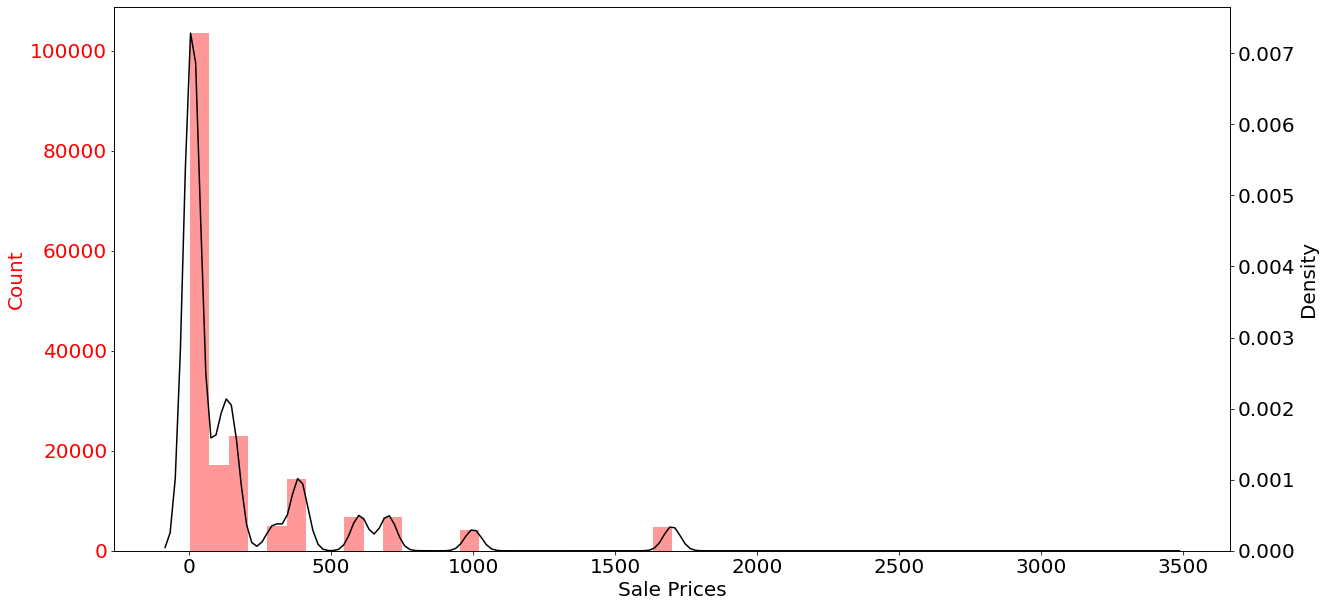

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Data visualization
import seaborn as sns # Importing Seaborn
import matplotlib    #Importing Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font', size=20)                #Use big fonts and big plots  
matplotlib.rc('figure', facecolor='white')
plt.rcParams["figure.figsize"] = (20,10)

sales_dataframe = dataframe[['Order Date','Sales']].set_index('Order Date').sort_index()


ax = sns.distplot(sales_dataframe['Sales'], kde=False, color='red')
ax.set(ylabel='Count', xlabel='Sale Prices')
ax.yaxis.label.set_color('red')
for tl in ax.get_yticklabels():
        tl.set_color('red')

ax2 = plt.twinx()
ax2 = sns.distplot(sales_dataframe['Sales'], kde=True,color='k' ,hist=False, ax=ax2)
ax2.set_ylabel('Density')
plt.show()

In the x-axis is shown the amount of money made by the sells. Cheap purchases are the most frequent, while expensive purchases were the less frequent.

## Total amount of money raised

I will plot the total amount of money raised annually, quarterly, monthly, weekly, and daily, to have an overall picture of the economic situation of the company.

Text(0, 0.5, 'Total amount of money raised (euros)')

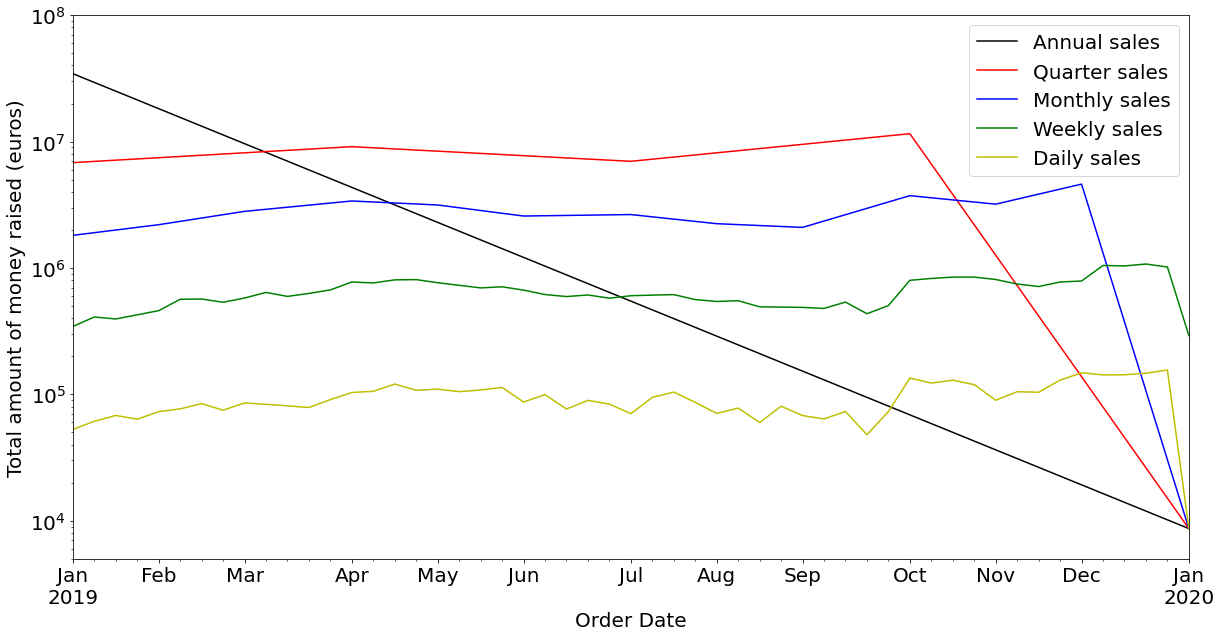

In [52]:
import matplotlib    #Importing Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font', size=20)                #Use big fonts and big plots  
matplotlib.rc('figure', facecolor='white')
plt.rcParams["figure.figsize"] = (20,10)

dataframe.groupby(pd.Grouper(key="Order Date", freq="1Y")).sum()["Sales"].plot(color='k',label='Annual sales')
dataframe.groupby(pd.Grouper(key="Order Date", freq="1Q")).sum()["Sales"].plot(color='r',label='Quarter sales')
dataframe.groupby(pd.Grouper(key="Order Date", freq="1M")).sum()["Sales"].plot(color='b',label='Monthly sales')
dataframe.groupby(pd.Grouper(key="Order Date", freq="1W")).sum()["Sales"].plot(color='g',label='Weekly sales')
dataframe.groupby(pd.Grouper(key="Order Date", freq="1D")).sum()["Sales"].plot(color='y',label='Daily sales')
plt.legend(loc='best')
plt.yscale('log')
plt.ylim(5e3,1e8)
plt.ylabel('Total amount of money raised (dollars)')                           

1. I see that from 2019 to 2020, the company had an important decrease of the amount of money rised, going from 34.4 millions euros in 2019, to only 8670 euros in the course of 2020. This is shown in the black line.

In [106]:
sales = dataframe.groupby(pd.Grouper(key="Order Date", freq="1Y")).sum()["Sales"]
print('The year with more money raised was :', sales[sales==max(sales)].index[0].year)
print('The year with less money raised was :', sales[sales==min(sales)].index[0].year)

The year with more money raised was : 2019
The year with less money raised was : 2020


2. Quarterly, the average sales remained almost constant till the last trimestre, which dropped down considerably. The most amount of money raised was during the quarter of the 31 December 2019.

In [108]:
sales = dataframe.groupby(pd.Grouper(key="Order Date", freq="1Q")).sum()["Sales"]
print('The quarter with more money raised was the quarter of the day:', sales[sales==max(sales)].index[0])
print('The quarter with less money raised was the quarter of the day:', sales[sales==min(sales)].index[0])

The quarter with more money raised was the quarter of the day: 2019-12-31 00:00:00
The quarter with less money raised was the quarter of the day: 2020-03-31 00:00:00


3. The amount of money raised monthly also behaves on average constant, increasing during Autumn and Winter, probably because of the Halloween, Thanks Giving and Chrismass Holidays, reaching its maximum in December 2019 and then decreasing considerably fast by the month of January 2020. The months with the most money raised was December 2019, followed by October 2019.

In [110]:
sales = dataframe.groupby(pd.Grouper(key="Order Date", freq="1M")).sum()["Sales"]
print('The month with more money raised was :', sales[sales==max(sales)].index[0])
print('The month with less money raised was :', sales[sales==min(sales)].index[0])

The month with more money raised was : 2019-12-31 00:00:00
The month with less money raised was : 2020-01-31 00:00:00


4. On the weekly base, the most money was raised during the week of the 22nd December 2019, followed by the week of the 8th December 2019.

In [111]:
sales = dataframe.groupby(pd.Grouper(key="Order Date", freq="1W")).sum()["Sales"]
print('The week with more money raised was the week of the day:', sales[sales==max(sales)].index[0])
print('The week with less money raised was the week of the day:', sales[sales==min(sales)].index[0])

The week with more money raised was the week of the day: 2019-12-22 00:00:00
The week with less money raised was the week of the day: 2020-01-05 00:00:00


In the next tab I will plot the different components of the weakly times series to explore for trends and seasonality.

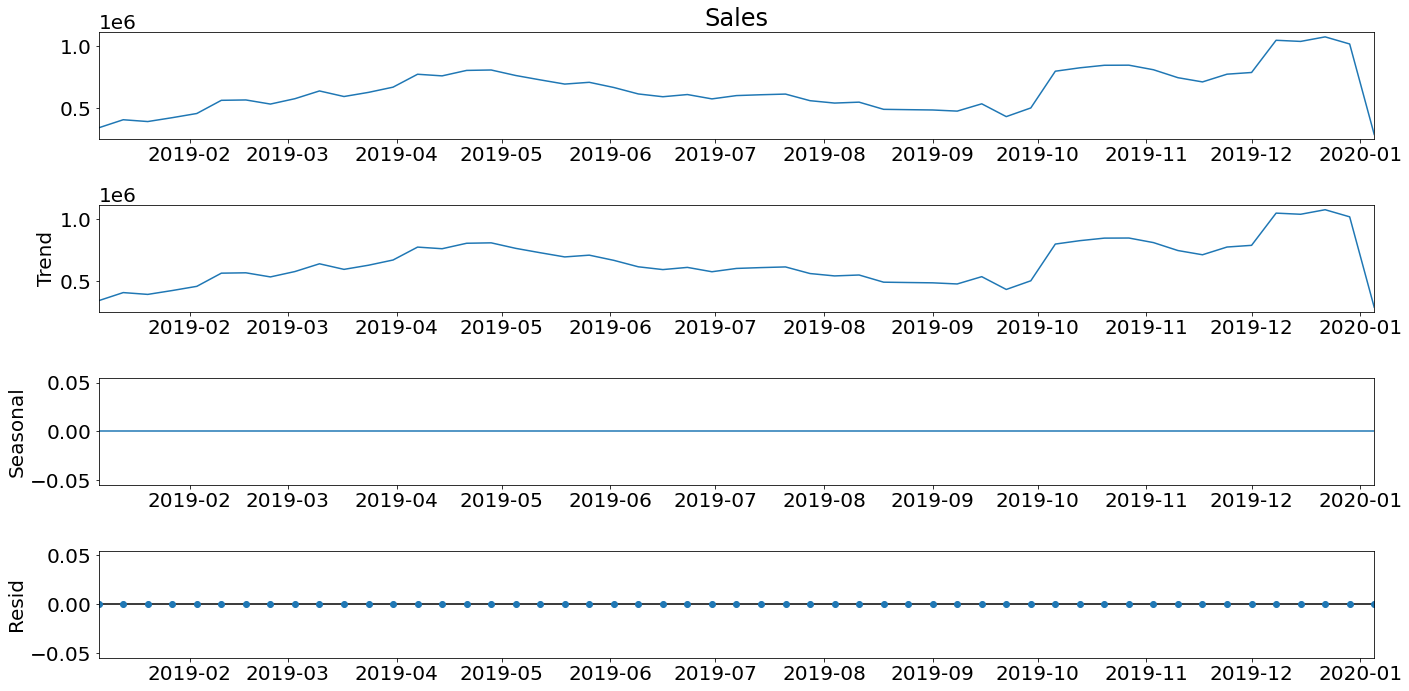

In [112]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = dataframe.groupby(pd.Grouper(key="Order Date", freq="1W")).sum()["Sales"]
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
plt.show()

I see as well no important trends nor seasonality and perfect zero residuals, reinforcing the fact that this database is artificial

5. On a daily basis, the most money was raised the 4th of December 2019. 

In [114]:
sales = dataframe.groupby(pd.Grouper(key="Order Date", freq="1D")).sum()["Sales"]
print('The day with more money raised was :', sales[sales==max(sales)].index[0])
print('The day with less money raised was :', sales[sales==min(sales)].index[0])

The day with more money raised was : 2019-12-04 00:00:00
The day with less money raised was : 2020-01-01 00:00:00


In the next tab I will plot the different components of the daily times series to explore for trends and seasonality.

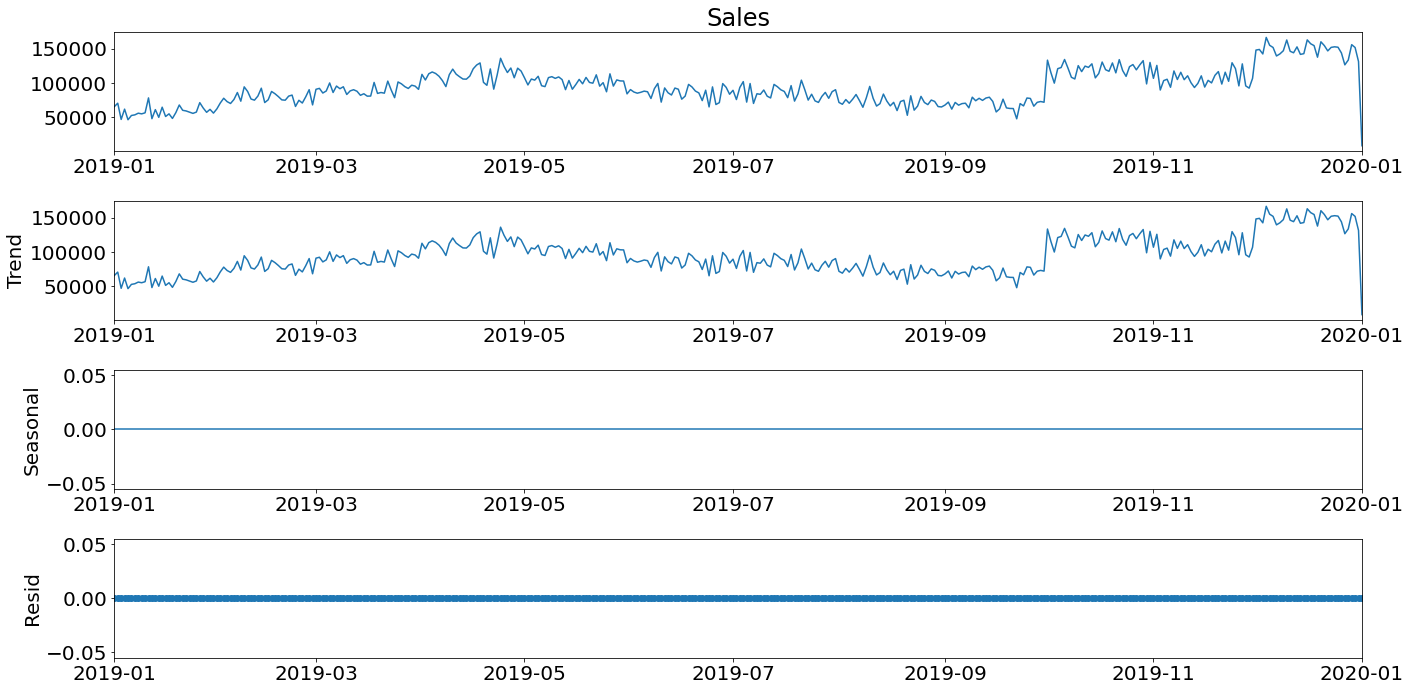

In [115]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = dataframe.groupby(pd.Grouper(key="Order Date", freq="1D")).sum()["Sales"]
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
plt.show()

I see as well no important trends nor seasonality and perfect zero residuals, reinforcing the fact that this database is artificial.

## Average amount of money raised

I will look now for the average amount of money raised yearly, quarterly, monthly, weekly and daily. A different result from the previous analysis is expected since I will be analyzing in short periods and the average is taken over those periods.

Text(0, 0.5, 'Average amount of money raised (euros)')

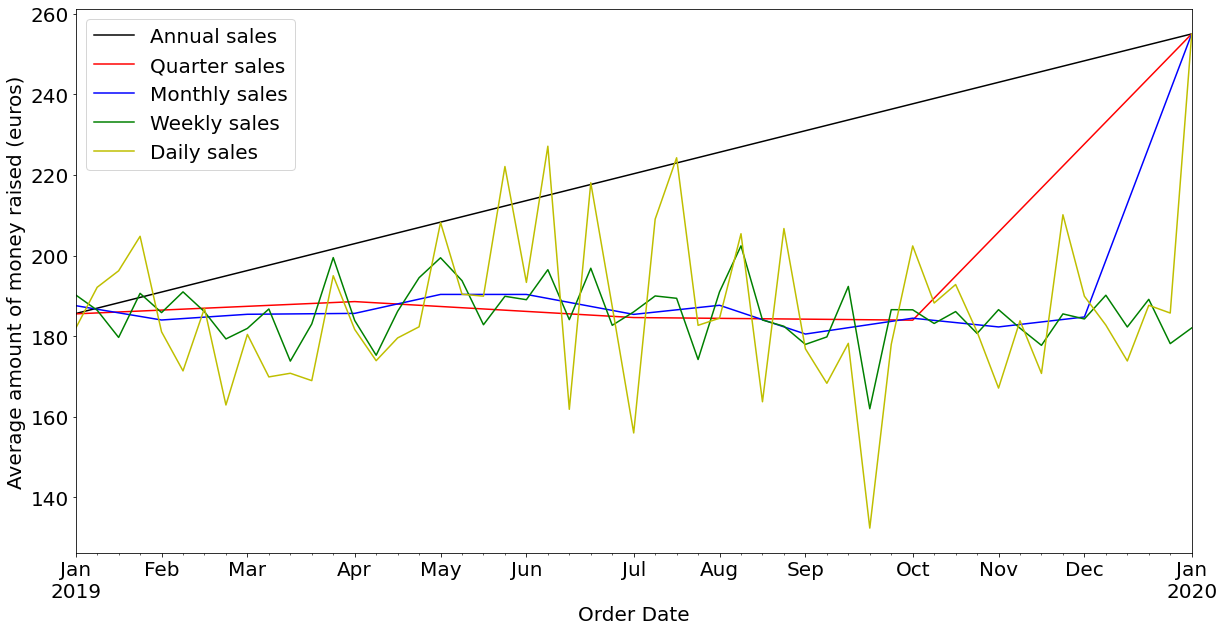

In [118]:
dataframe.groupby(pd.Grouper(key="Order Date", freq="1Y")).mean()["Sales"].plot(color='k',label='Annual sales')
dataframe.groupby(pd.Grouper(key="Order Date", freq="1Q")).mean()["Sales"].plot(color='r',label='Quarter sales')
dataframe.groupby(pd.Grouper(key="Order Date", freq="1M")).mean()["Sales"].plot(color='b',label='Monthly sales')
dataframe.groupby(pd.Grouper(key="Order Date", freq="1W")).mean()["Sales"].plot(color='g',label='Weekly sales')
dataframe.groupby(pd.Grouper(key="Order Date", freq="1D")).mean()["Sales"].plot(color='y',label='Daily sales')
plt.legend(loc='best')
plt.ylabel('Average amount of money raised (dollars)')                            

The average money raised shows a different profile than the total in time, since the average is taken over the number of days for each period. I will check as well then components of each time series weekly and daily, althought I don't expect either any kind of trending or seasonal behavior.

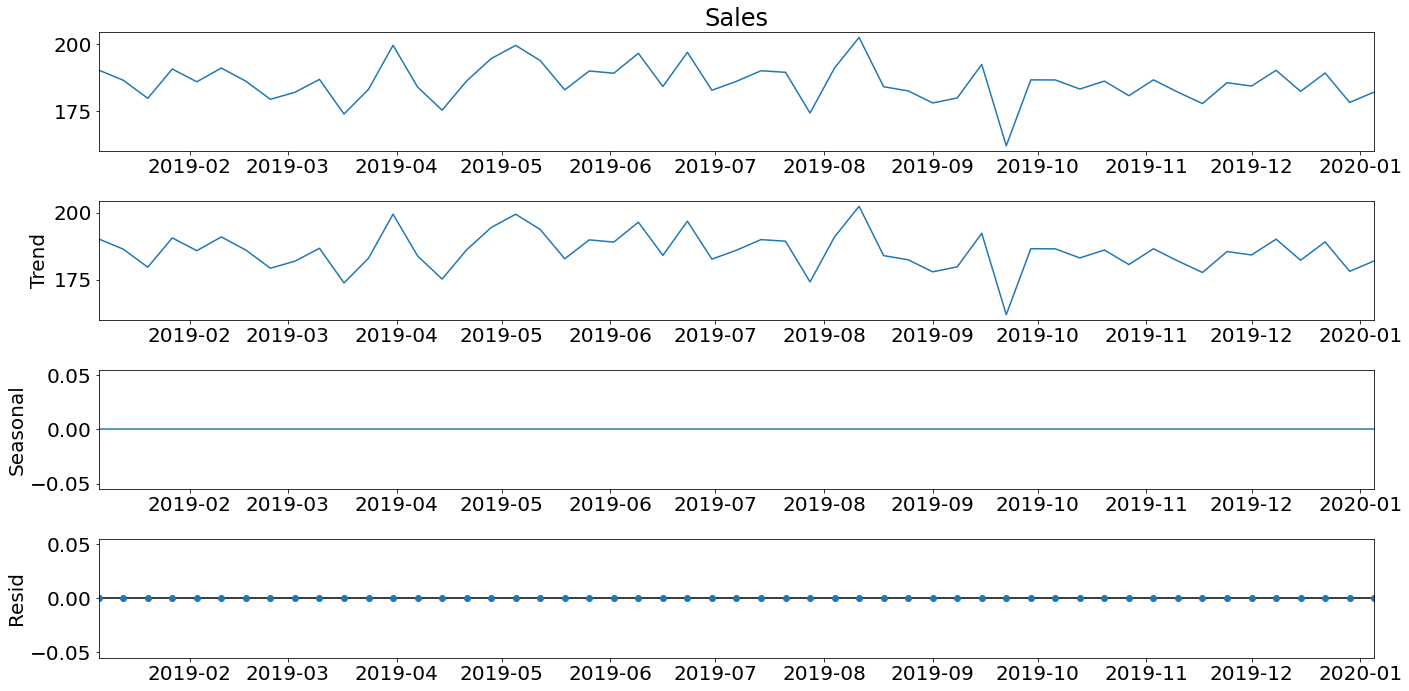

In [119]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = dataframe.groupby(pd.Grouper(key="Order Date", freq="1W")).mean()["Sales"]
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
plt.show()

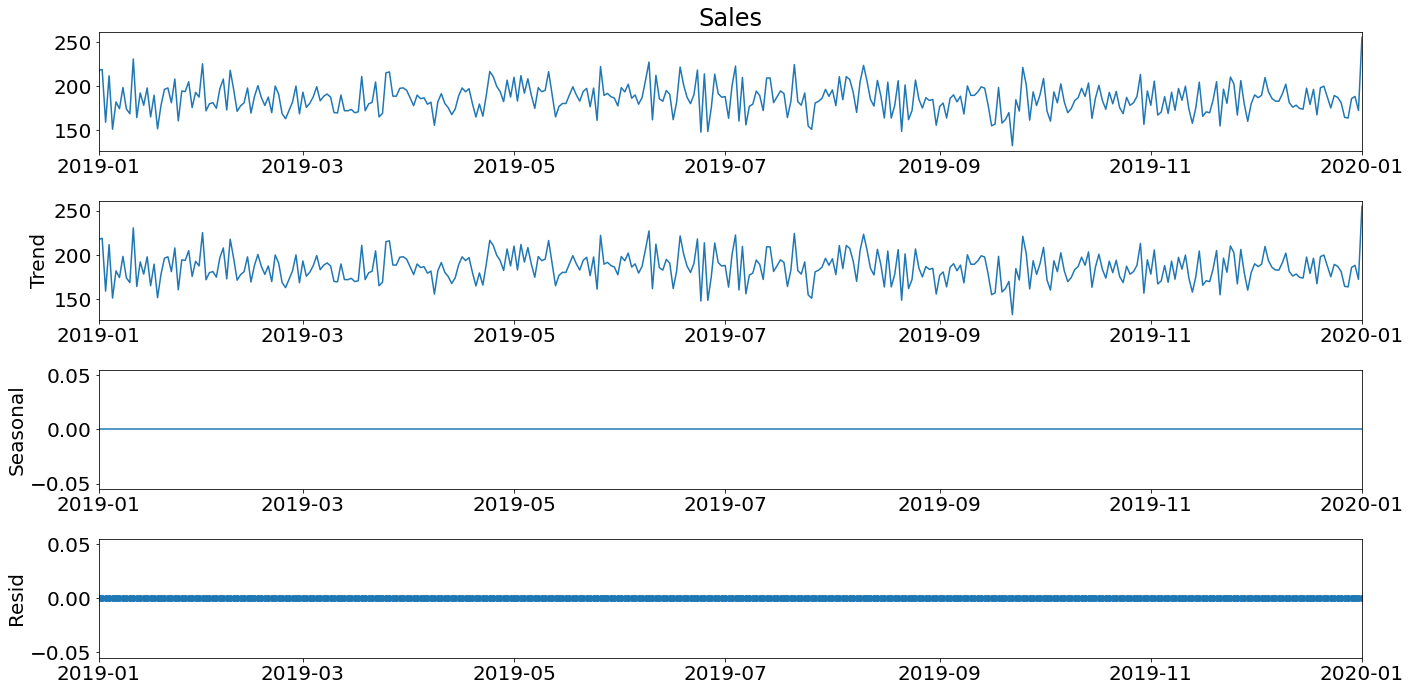

In [132]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = dataframe.groupby(pd.Grouper(key="Order Date", freq="1D")).mean()["Sales"]
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
plt.show()

## Purchases by city

In this subsection I will group the purchases by city and I will plot which city made the company raise the most amount of money, and the average as well.

I need first to extract the names of the city and the state from the 'Purchase Address' variable, then re-combine them into two words and make a new variable with this description. I will use the same functions as in the original project.

In [134]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

dataframe['City'] = dataframe['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City
0,194095.0,Wired Headphones,1.0,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",11.99,New York City (NY)
1,194096.0,AA Batteries (4-pack),1.0,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",3.84,Dallas (TX)
2,194097.0,27in FHD Monitor,1.0,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",149.99,New York City (NY)
3,194098.0,Wired Headphones,1.0,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",11.99,Dallas (TX)
4,194099.0,AAA Batteries (4-pack),2.0,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5.98,Seattle (WA)
...,...,...,...,...,...,...,...,...
185681,176554.0,Lightning Charging Cable,1.0,14.95,2019-03-24 11:14:00,"672 12th St, San Francisco, CA 94016",14.95,San Francisco (CA)
185682,176555.0,27in FHD Monitor,1.0,149.99,2019-03-22 20:27:00,"42 4th St, San Francisco, CA 94016",149.99,San Francisco (CA)
185683,176556.0,AAA Batteries (4-pack),3.0,2.99,2019-03-14 10:29:00,"871 7th St, Los Angeles, CA 90001",8.97,Los Angeles (CA)
185684,176557.0,iPhone,1.0,700.00,2019-03-30 12:32:00,"83 Washington St, San Francisco, CA 94016",700.00,San Francisco (CA)


Once created the new 'City' variable, I will plot now the total and tha average amounts of money by selling concept. 

### Total money raised vs. State

In total, the cities that made the company raise more money were San Francisco, followed by Los Angeles and NYC. The one that raised the less was Portland.

Text(0, 0.5, 'Money (dollars)')

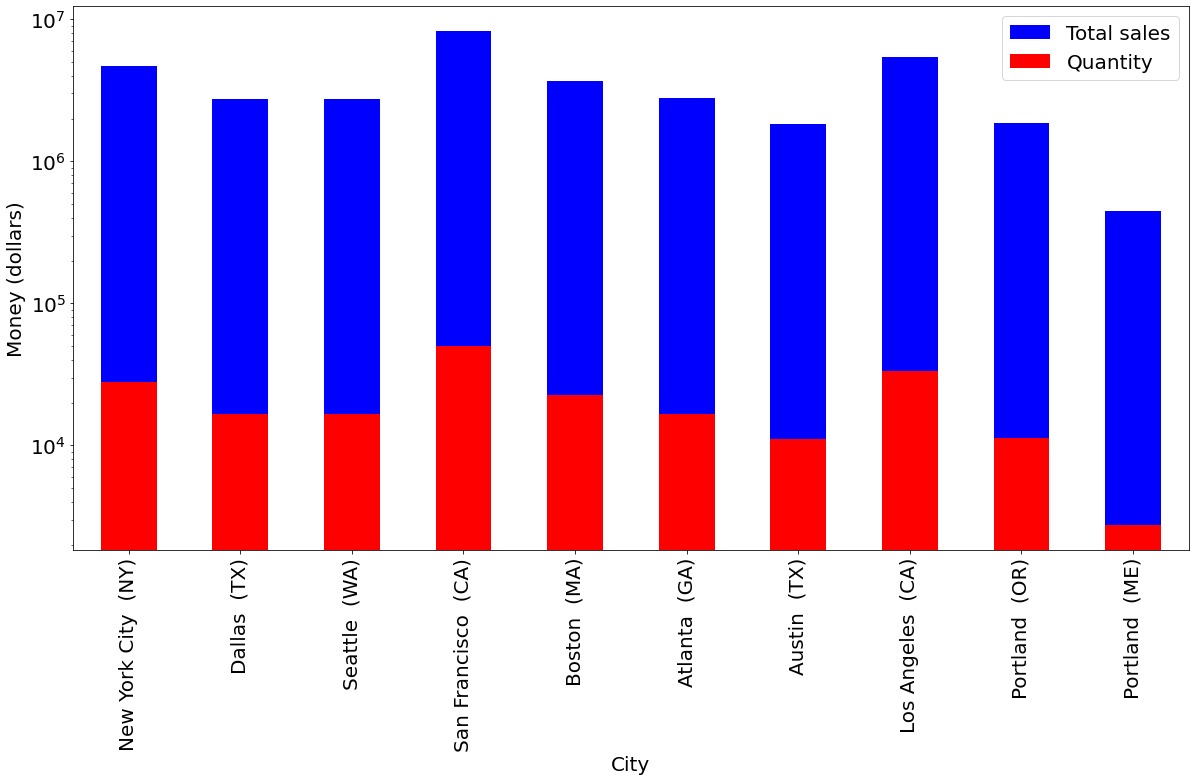

In [153]:
dataframe.groupby(pd.Grouper(key="City")).sum()["Sales"].plot.bar(color='b',label='Total sales')
dataframe.groupby(pd.Grouper(key="City")).sum()["Quantity Ordered"].plot.bar(color='r',label='Quantity')
plt.legend(loc='best')
plt.yscale('log')
plt.ylabel('Money (dollars)')                            

### Average money raised vs. State

On average, the cities that made the company raise more money were Atlanta, followed by NYC, Portland (Oregon) and Dallas. The one that raised the less was Portland (Maine).

Text(0, 0.5, 'Money (dollars)')

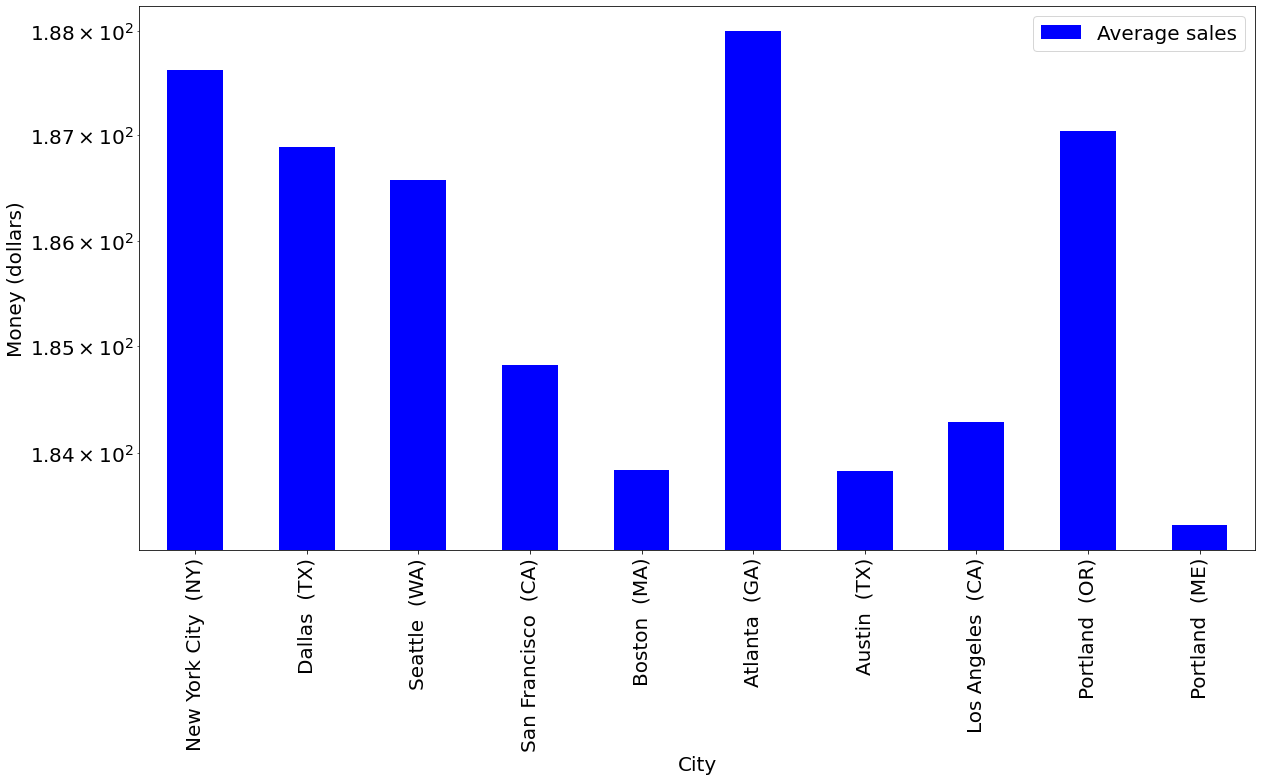

In [159]:
dataframe.groupby(pd.Grouper(key="City")).mean()["Sales"].plot.bar(color='b',label='Average sales')
plt.legend(loc='best')
plt.yscale('log')
plt.ylabel('Money (dollars)')  

## Products sold the most

For marketing reasons, it is important to know the demand of products. I will plot which product sold raised the the most amount of money during the total amount of time registered in the database. I will plot as well the number of products sold.

I see that MacBook Pro Laptops and iPhone were the products that raised more money to the company (probably because they are very expensive. This can be seen in the red barplots that the amount of product is not very high. The most sold products were AA and AAA Batteries (4-pack). The less sold products were LG Dryer and LG washing machines.

Text(0, 0.5, 'Money (dollars)')

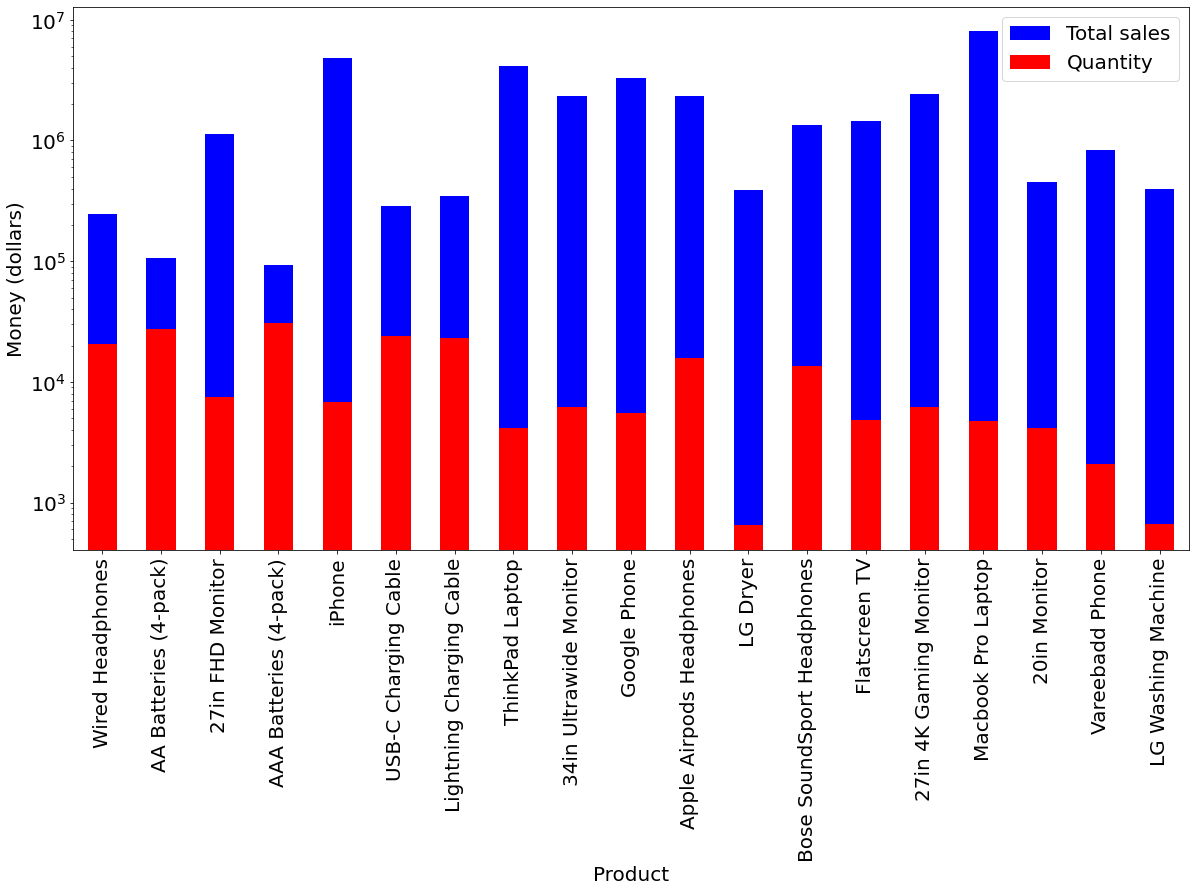

In [161]:
dataframe.groupby(pd.Grouper(key="Product")).sum()["Sales"].plot.bar(color='b',label='Total sales')
dataframe.groupby(pd.Grouper(key="Product")).sum()["Quantity Ordered"].plot.bar(color='r',label='Quantity')
plt.legend(loc='best')
plt.yscale('log')
#plt.ylim(1e5,1e8)
plt.ylabel('Money (dollars)')  

On average the most sold products were the MacBook Pro Laptops, followed by ThinkPad Laptops and iPhones. On average, the less sold products were AA and AAA Batteries (4-pack).

Text(0, 0.5, 'Money (dollars)')

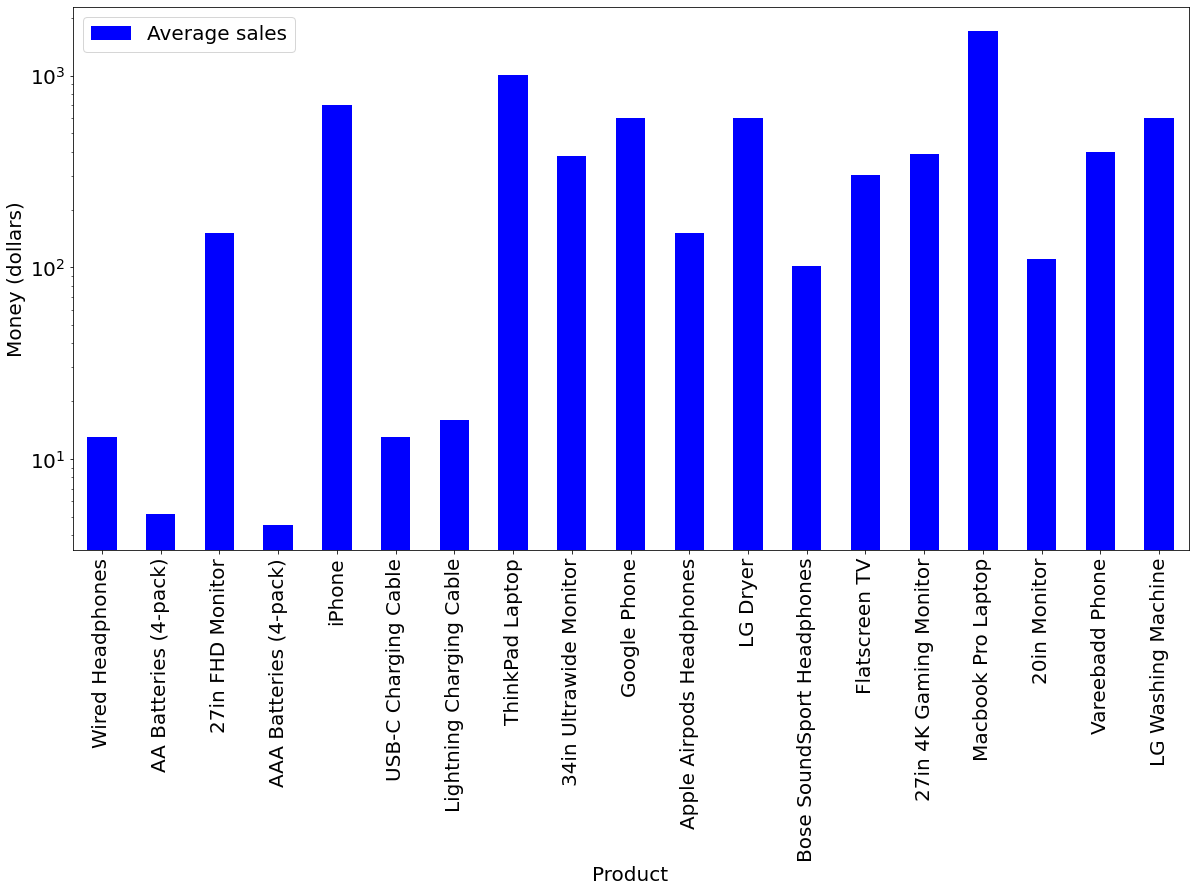

In [160]:
dataframe.groupby(pd.Grouper(key="Product")).mean()["Sales"].plot.bar(color='b',label='Average sales')
plt.legend(loc='best')
plt.yscale('log')
plt.ylabel('Money (dollars)')  

## Products sold together

I see that there are repeated values in the Order ID variable, which means that the same person bought not only one product, but several.
I will look for those products sold together.

In [226]:
from itertools import combinations
from collections import Counter
import warnings
warnings.filterwarnings("ignore")


df = dataframe[dataframe['Order ID'].duplicated(keep=False)]

#I am creating a new column with the names of the products bought together
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

count = Counter()

Top 15 products sold by pairs

In [227]:
for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(15):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58


Top 15 products sold by triplets

In [229]:
for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

for key,value in count.most_common(50):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 172
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 124
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 94
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 70
('Apple Airpods Headphones', 'Wired Headphones') 69
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired He

Top 15 products sold in four

In [230]:
for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 4)))

for key,value in count.most_common(15):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 172
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 124
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 94
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80


Longest purchase

In [233]:
for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 5)))

for key,value in count.most_common(15):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 172
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 124
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 94
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
